<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Operaciones lógicas y máscaras </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/openCV.jpg" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** es una biblioteca libre desarrollada originalmente por Intel. Vio la luz en el año 1999. Escrita originalmente en C/C++, su mejor virtud es que es multiplataforma, se puede ejecutar en diferentes sistemas operativos (Linux, Windows, Mac OS X, Android e iOS). También la podemos utilizar en diferentes lenguajes de programación como Java, Objective C, C# y *Python*.

Quizás sea la biblioteca de visión artificial más importante y más usada. Es utilizada por universidades, empresas y gente del movimiento Maker para dar rienda suelta a su imaginación al tratarse de un software libre.

En este notebook comenzaremos con el tratamiento de imágenes en Python mediante esta librería, más específicamente vamos a ver como cargar o  leer una imagen, conversión a blanco y negro, filtros y otras operaciones que serán útiles dentro del curso.


   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
def plt_imshow(title, image):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# TAREA 

<div class="alert alert-success">
    
**Ejercicio 1**
    
 <ul>     
  <li>a) Generar imagenes como las que se muestran a continuación (300 x 300)</li>
  <li>b) Aplicar las operaciones de AND, OR y XOR</li>
   <li>b)Aplicar la operación inversa a ambas imagenes</li>     
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/circulo_triangulo.png">


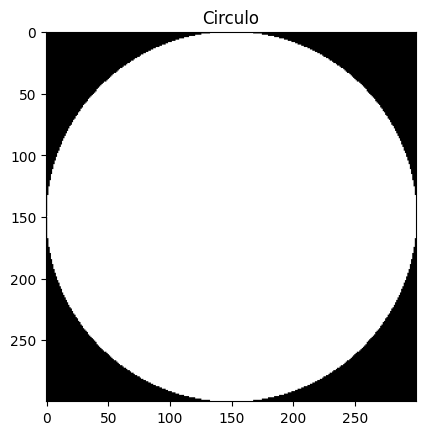

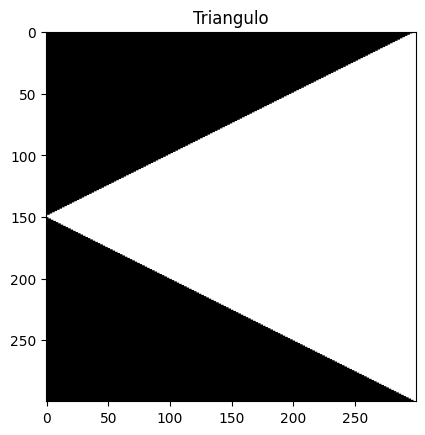

In [3]:
# Circulo
circle=np.zeros((300, 300), dtype = "uint8")
cv.circle(circle, (150, 150), 150, 255, -1)
triangle=np.zeros((300, 300), dtype = "uint8")
puntos=np.array(  [[0,150], [300,0], [300,300]])
cv.fillPoly(triangle, [puntos], (255,255,255))

plt_imshow("Circulo",circle)
plt_imshow("Triangulo",triangle)

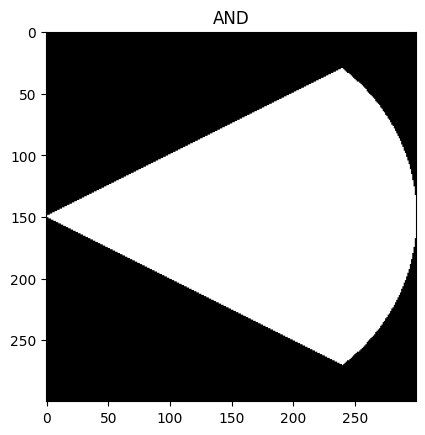

In [4]:
#AND
img_and=cv.bitwise_and(circle, triangle)
plt_imshow("AND", img_and)

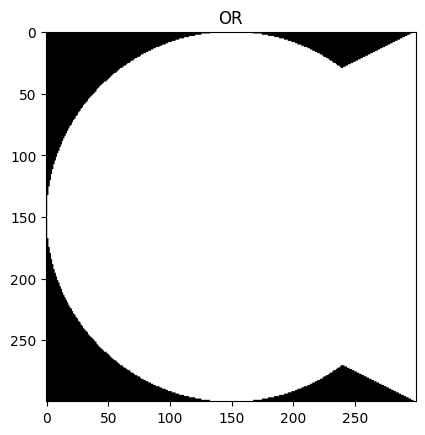

In [5]:
#OR
img_or=cv.bitwise_or(circle, triangle)
plt_imshow("OR", img_or)

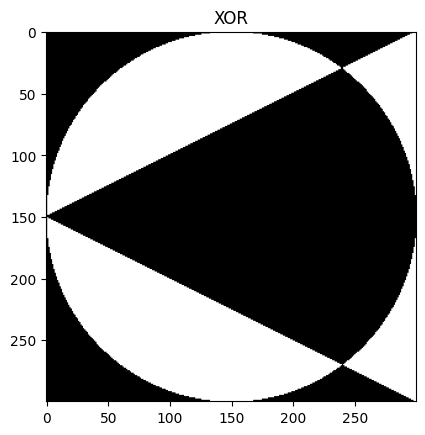

In [6]:
#XOR
img_xor=cv.bitwise_xor(circle, triangle)
plt_imshow("XOR", img_xor)

<div class="alert alert-success">
    
**Ejercicio 2.  Descargar una imagen con el rostro de una persona**
    
   
 <ul>
  <li>a) Generar y aplicar una mascara con una circunferencia </li>
  <li>b) Generar y aplicar una mascara con un cuadrado</li>
</ul> 

</div>


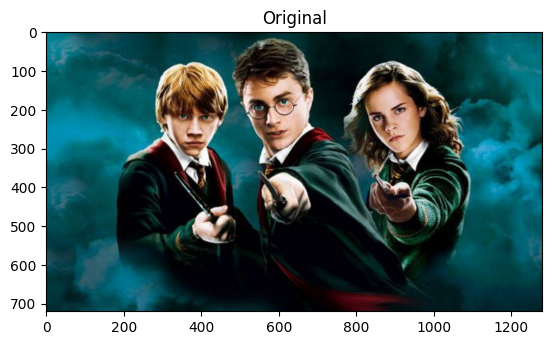

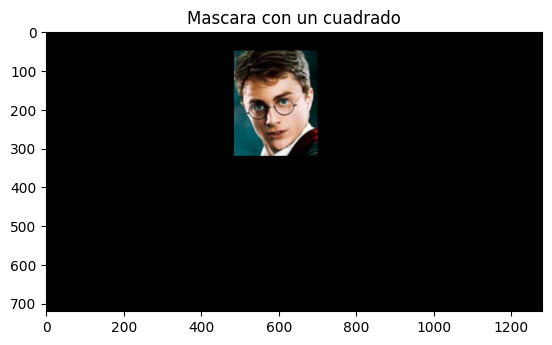

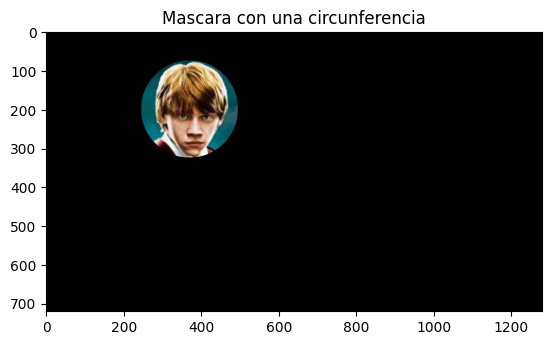

In [34]:
img_cara=cv.imread('figuras/people2.jpg')
plt_imshow("Original",img_cara)

rectangle_masc=np.zeros(img_cara.shape[:2], dtype="uint8")
cv.rectangle(rectangle_masc, (485, 50), (700, 320), 255, -1)
img_mascara_rectangular=cv.bitwise_and(img_cara, img_cara, mask=rectangle_masc)
plt_imshow("Mascara con un cuadrado", img_mascara_rectangular)

circle_masc=np.zeros(img_cara.shape[:2], dtype="uint8")
cv.circle(circle_masc, (370, 200), 125, 255, -1)
img_mascara_circular=cv.bitwise_and(img_cara, img_cara, mask=circle_masc)
plt_imshow("Mascara con una circunferencia", img_mascara_circular)

<div class="alert alert-success">
    
**Ejercicio 3**
    
   
 <ul>
  <li>a) Utilizando el archivo "figuras/letras.png.", aplicar todas las operaciones posibles para tratar de limpiar las letras de la figura del ruido existente </li>
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/letras.png">

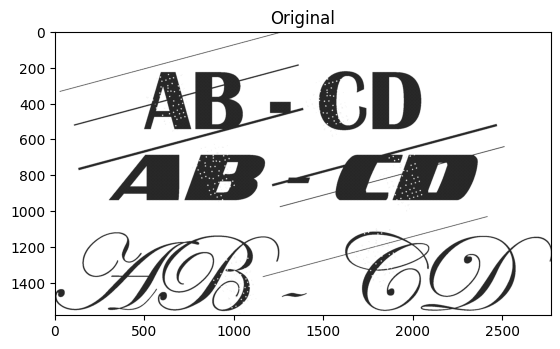

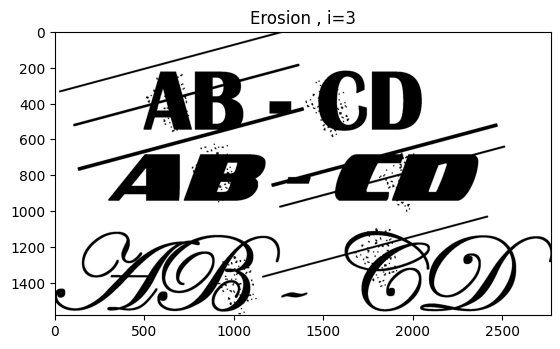

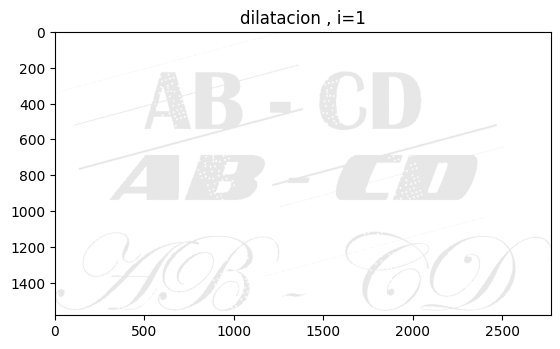

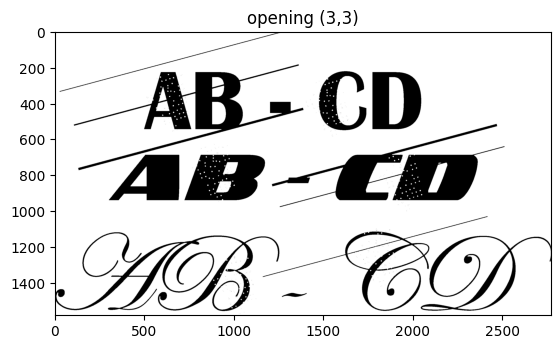

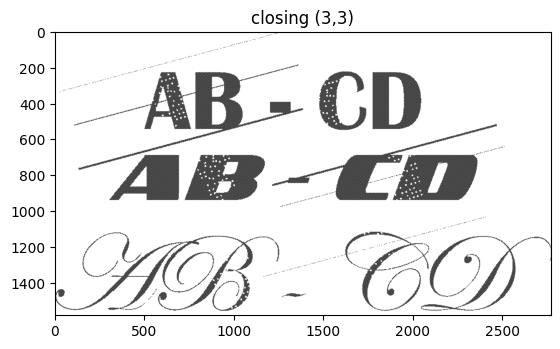

In [54]:
img_letra=cv.imread('figuras/letras.png')
plt_imshow("Original",img_letra)

img_gray=cv.cvtColor(img_letra,cv.COLOR_BGR2GRAY)

erosion = cv.erode(img_gray.copy(), None, iterations=3)
plt_imshow('Erosion , i=3', erosion)
dilatacion = cv.dilate(img_gray.copy(), None, iterations=1)
plt_imshow('dilatacion , i=1', dilatacion)

kernel=cv.getStructuringElement(cv.MORPH_RECT, (3,3))
opening=cv.morphologyEx(img_gray.copy(), cv.MORPH_OPEN, kernel)
plt_imshow('opening (3,3)',opening)

kernel2=cv.getStructuringElement(cv.MORPH_RECT, (3,3))
closing=cv.morphologyEx(img_gray.copy(), cv.MORPH_CLOSE, kernel2)
plt_imshow('closing (3,3)',closing)

<div class="alert alert-success">
    
**Ejercicio 4**
    
   
 <ul>
  <li> Utilizar una imagen que tenga algún objeto en color azul y obtenga una nueva imagen en donde todo lo azul este a color y el resto en escala de grises   </li>
</ul> 

</div>


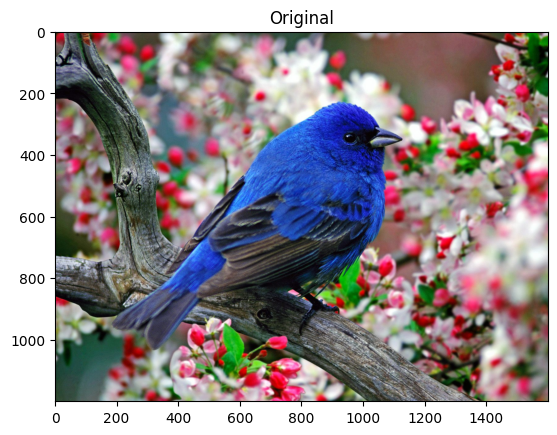

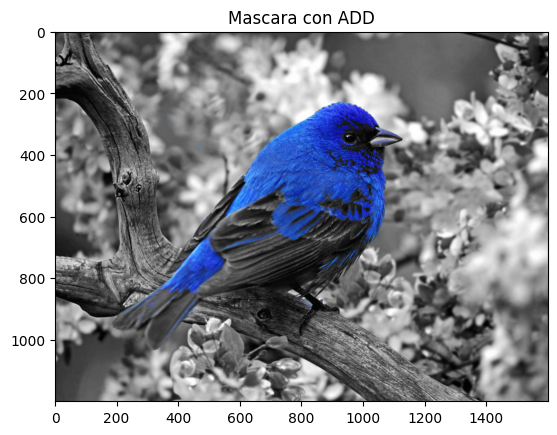

In [32]:
#(hMin = 97 , sMin = 78, vMin = 138), (hMax = 125 , sMax = 255, vMax = 255)
img_bird=cv.imread('figuras/bird.jpg')
plt_imshow("Original",img_bird)

img_hsv=cv.cvtColor(img_bird,cv.COLOR_BGR2HSV)
inferior=np.array([97,78,138])
superior=np.array([125,255,255])

mascara=cv.inRange(img_hsv, inferior, superior)

img_gray=cv.cvtColor(img_bird,cv.COLOR_BGR2GRAY)
img_gray_resta=cv.subtract(img_gray,mascara)
img_gray_resta_rgb=cv.cvtColor(img_gray_resta, cv.COLOR_GRAY2BGR)

img_mascara=cv.bitwise_and(img_bird, img_bird, mask=mascara)
img_final=cv.add(img_gray_resta_rgb, img_mascara)
plt_imshow("Mascara con ADD", img_final)